In [1]:
import numpy as np
import skimage
from skimage import io
from skimage import transform
from get_keypoints import *
import matplotlib.pyplot as plt

%matplotlib inline

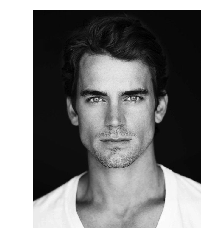

In [2]:
source = io.imread('examples/face.jpg')
plt.imshow(source)
plt.axis('off')
plt.show()

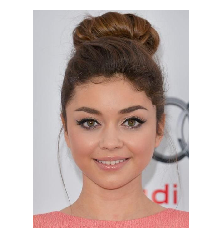

In [3]:
target = io.imread('examples/face3.jpg')
plt.imshow(target)
plt.axis('off')
plt.show()

/Users/teodormoiseev/miniconda3/envs/pytorch/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/teodormoiseev/miniconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/Users/teodormoiseev/miniconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
Clipping input data to the valid range for imshow with 

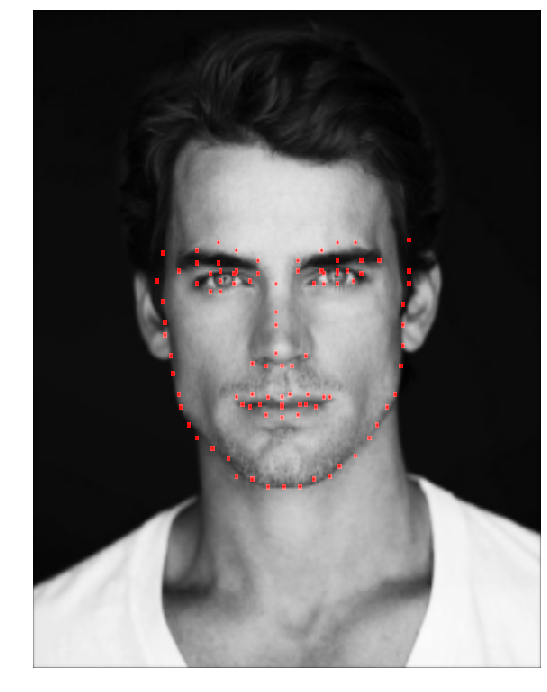

In [4]:
result = transform_img_with_keypoints(source, keypoints_dataset='WFLW')
result = transform.resize(result, source.shape, anti_aliasing=True)

dpi = 80
height, width, nbands = source.shape
figsize = width / float(dpi), height / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(result, interpolation='nearest')

plt.show()

In [5]:
result.shape

(731, 564, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


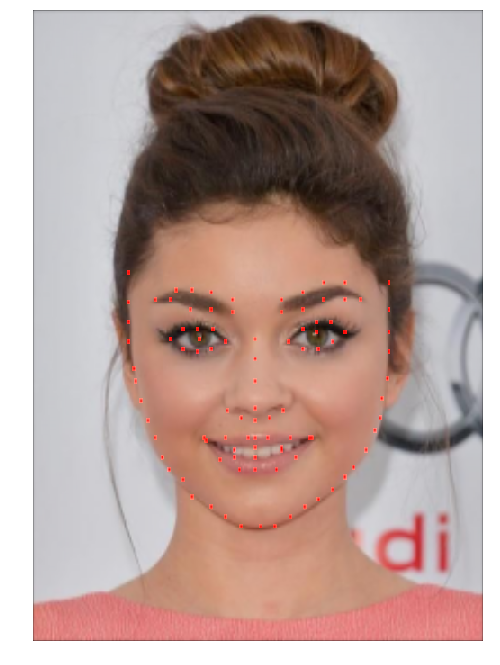

In [6]:
result = transform_img_with_keypoints(target, keypoints_dataset='WFLW')
result = transform.resize(result, target.shape, anti_aliasing=True)

dpi = 80
height, width, nbands = target.shape
figsize = width / float(dpi), height / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(result, interpolation='nearest')

plt.show()

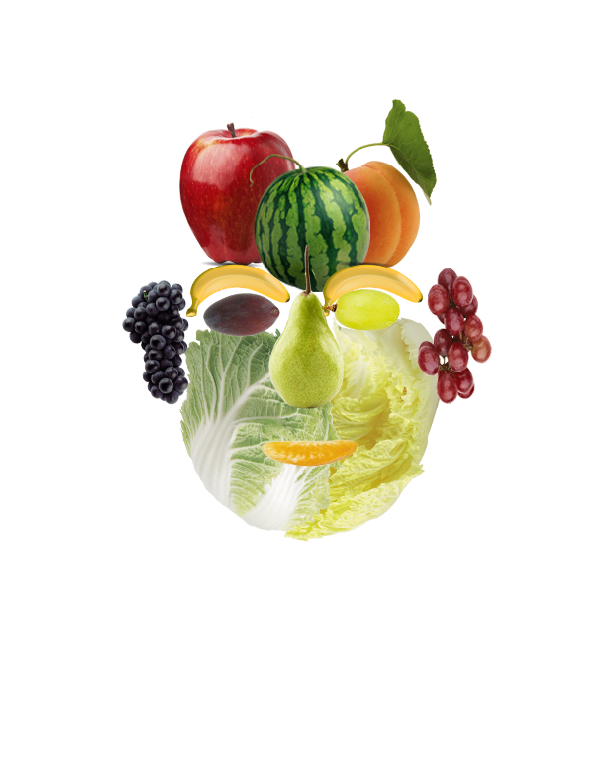

In [7]:
source_musk = io.imread('examples/mask_full1.png')

plt.figure(figsize=(10, 20))
plt.imshow(source_musk)
plt.axis('off')
plt.show()

In [8]:
target_keypoints_pred = get_keypoints(target).numpy()[0]

In [9]:
print(target_keypoints_pred.shape)
shape = source.shape[:2]
big_target_keypoints_pred = np.zeros((target_keypoints_pred.shape[0],) + source.shape[:2])

for i in range(target_keypoints_pred.shape[0]):
    big_target_keypoints_pred[i] = transform.resize(target_keypoints_pred[i], shape)
    
print(big_target_keypoints_pred.shape)

(98, 256, 256)


/Users/teodormoiseev/miniconda3/envs/pytorch/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(98, 731, 564)


In [10]:
def get_keypoints_coord(pred):
    flatten = np.argmax(pred.reshape(pred.shape[0], -1), axis=-1)
    result = np.zeros((flatten.shape[0], 2), dtype=int)
    result[:, 1] = flatten // pred.shape[-1]
    result[:, 0] = flatten % pred.shape[-1]
    
    return result

In [11]:
target_keypoints = get_keypoints_coord(big_target_keypoints_pred)

target_keypoints.shape

(98, 2)

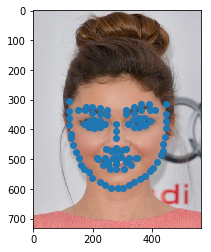

In [12]:
plt.imshow(transform.resize(target, source.shape[:2]))
plt.scatter(target_keypoints[:, 0], target_keypoints[:, 1])
plt.show()

In [13]:
target_keypoints[0]

array([119, 304])

In [37]:
import os
import random

fruits = []
mappings = []
coords = []

with open('fruits/mapping.csv') as m:
    for line in m:
        ar = line.split(',')
        coord = [int(x) for x in ar[1:3]]
        mapping = int(ar[3])
        if ar[0] != '':
            if os.path.exists('fruits/files/Fruit{}_2.png'.format(int(ar[0]))):
                add = random.choice(['_2', ''])
                #add = '_2'
            else:
                add = ''
            fruit = io.imread('fruits/files/Fruit{}{}.png'.format(int(ar[0]), add))
            fruits.append(fruit)
            mappings.append([])
            coords.append([])
        mappings[-1].append(mapping)
        coords[-1].append(coord)

In [38]:
os.path.exists('fruits/files/Fruit6_2.png')

False

In [39]:
len(fruits), len(mappings), len(coords)

(13, 13, 13)

In [40]:
mappings[0], coords[0]

([35, 34, 36], [[206, 259], [182, 266], [225, 267]])

In [41]:
for i, (fruit, mapping, coord) in enumerate(zip(fruits, mappings, coords)):
    target_coord = target_keypoints[mapping]
    coord = np.array(coord)
    #t = transform.estimate_transform('similarity', coord, target_coord)
    #w_fruit = transform.warp(fruit, inverse_map=t.inverse, preserve_range=True)
    # print(fruit.max(), w_fruit.max())
    #mask = (w_fruit[:, :, -1] > 0.5)
    # plt.imshow(mask)
    # plt.show()
    # print(result[mask].shape, mask.sum())
    # print(w_fruit[:, :, :3][mask].max())
    #result[mask] = w_fruit[:, :, :3][mask]
    #print(i)
    #plt.figure(figsize=(10, 15))
    #plt.imshow(fruit)
    #plt.scatter(target_coord[:, 0], target_coord[:, 1], label='target')
    #plt.scatter(coord[:, 0], coord[:, 1], label='fruit')
    #plt.legend()
    #plt.show()

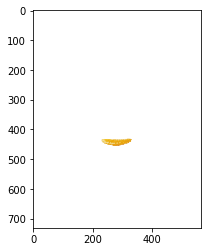

In [42]:
plt.imshow(fruits[12])

In [43]:
mappings[12]

[85, 86, 84, 76, 82, 90]

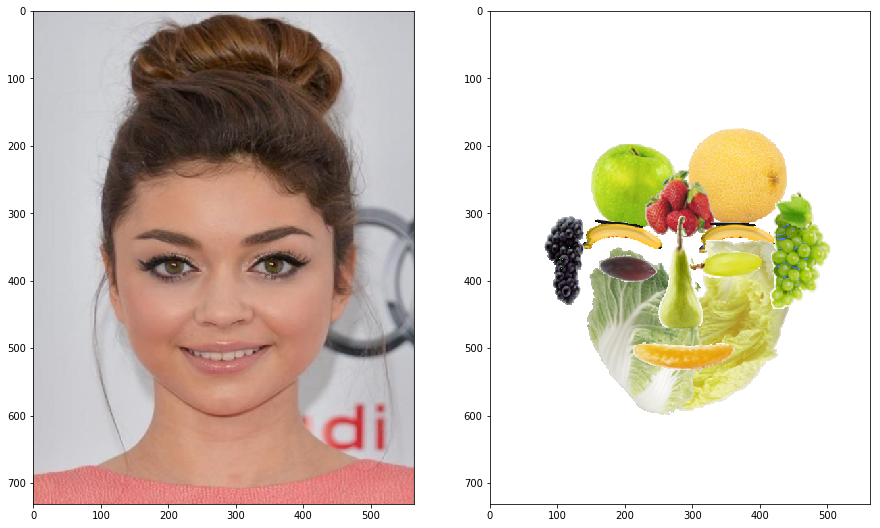

In [44]:
result = np.zeros_like(source)

for fruit, mapping, coord in zip(fruits, mappings, coords):
    target_coord = target_keypoints[mapping]
    coord = np.array(coord)
    t = transform.estimate_transform('similarity', coord, target_coord)
    w_fruit = transform.warp(fruit, inverse_map=t.inverse, preserve_range=True)
    # print(fruit.max(), w_fruit.max())
    mask = (w_fruit[:, :, -1] > 0.5)
    # plt.imshow(mask)
    # plt.show()
    # print(result[mask].shape, mask.sum())
    # print(w_fruit[:, :, :3][mask].max())
    result[mask] = w_fruit[:, :, :3][mask]
result[result == 0] = 255
plt.figure(figsize=(15, 25))
plt.subplot(1, 2, 1)
plt.imshow(transform.resize(target, source.shape[:2]))
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

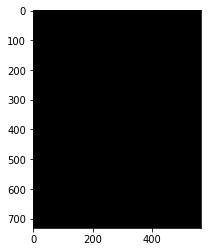

In [62]:
plt.imshow(result)

In [18]:
t = transform.estimate_transform('affine', source_keypoints, target_keypoints)

result = transform.warp(transform.resize(source_musk, (256 * 4, 256 * 4), anti_aliasing=True), 
                        inverse_map=t.inverse)
result = transform.resize(result, source_musk.shape, anti_aliasing=True)

dpi = 80
height, width, nbands = target.shape
figsize = width * 2 / float(dpi), height * 2 / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0.5, 0.5, 0.5])
ax.axis('off')
ax.imshow(source)

ax = fig.add_axes([0.5, 0.5, 0.5, 0.5])
ax.axis('off')
ax.imshow(source_musk)

ax = fig.add_axes([0, 0, 0.5, 0.5])
ax.axis('off')
ax.imshow(target)

ax = fig.add_axes([0.5, 0, 0.5, 0.5])
ax.axis('off')
ax.imshow(result)

plt.show()

NameError: name 'source_keypoints' is not defined